In [1]:
from typing import Iterable

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def shoot_for_hw(
    phi_n: np.array,
    epsilon_n: float,
    x_value: float,
    K: int = 1,
) -> np.array:
    """"Therefore"""
    return np.array(
        [
            phi_n[1],
            (K*x_value**2 - epsilon_n)*phi_n[0]
        ]
    )

In [ ]:
zero_centered_boundary = 4
step_size = 0.1
xrange = np.arange(-zero_centered_boundary, zero_centered_boundary, step=step_size)



In [3]:
# The abdsolute value of the first 5 eigenfunctions, this should be (2,5)
A1 = None
# The corresponding first 5 eigenvalues, this should be (1,5)
A2 = None

In [19]:
def shoot2(
    x: np.array,
    xshoot: Iterable,
    n0: float,
    beta: float,
) -> np.array:
    """"this is a doc string"""
    return [x[1], (beta-n0)*x[0]]

In [20]:
xshoot = [-1, 1]
n0 = 100
beta = 50

x0 = np.array([0, 1])

y = odeint(
    shoot2,
    x0,
    xshoot,
    args=(n0, beta)
)

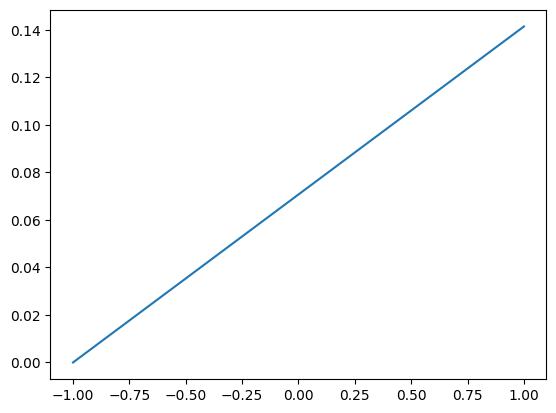

In [15]:
plt.plot(xshoot, y[:,0])
plt.show()

In [3]:
def bvpexam_rhs(
    y: np.array,
    x: float
) -> np.array:
    y_prime = [
        y[1],
        -(x**2 - np.sin(x))*y[1] + np.cos(x)**2*y[0] + 5
    ]
    return y_prime

In [4]:
xspan = [0, 1]
y_1_at_0 = 3
y_2_at_1 = 5

A = -3
dA = 0.5

for j in range(100):
    y0 = [3, A]
    x = np.linspace(xspan[0], xspan[1], 100)
    ysol = odeint(bvpexam_rhs, y0=y0, t=x)

    if np.abs(ysol[-1, 1] - y_2_at_1) < 1e-6:
        break

    if ysol[-1, 1]  < 5:
        A += dA
    else:
        A -= dA
        dA /= 2
    